## Solution to exercise 1 

### Dynamic Programming with John Stachurski

The question was: Does there always exists a $x \in [0, \infty)$ that solves the equation
$$
    x
    = c (1-\beta) + \beta
    \sum_{k=1}^K \max \left\{
        w_k ,\, x
    \right\}
    \, p_k
$$
Is it unique?  Suggest a strategy for computing it.

We are assuming here that $\beta \in (0, 1)$.

There were hints, as follows:

* Use the metric space $(\mathbb R, \rho)$ where $\rho(x, y) = |x-y|$

*  If $x_1, \ldots, x_K$ are any $K$ numbers, then

$$ \left| \sum_{k=1}^K x_k \right| \leq \sum_{k=1}^K |x_k| $$

* For any $a, x, y$ in $\mathbb R$, 
    
$$ 
    \left| 
            \max \left\{ a,\, x \right\} - \max \left\{ a,\, y \right\} 
        \right|
        \leq | x - y |
$$


You can convince yourself of the second inequality by sketching and checking different cases...

### Solution

We're going to use the contraction mapping theorem.  Let 

$$ 
    f(x)
    = c (1-\beta) + \beta
    \sum_{k=1}^K \max \left\{
        w_k ,\, x
    \right\}
    \, p_k
$$

We're looking for a fixed point of $f$ on $\mathbb R_+ = [0, \infty)$.

Using the hints above, we see that, for any $x, y$ in $\mathbb R_+$, we have

\begin{align}
    |f(x) - f(y)|
    & = \left| 
          \beta \sum_{k=1}^K \max \left\{
                w_k ,\, x
            \right\} \, p_k
           -
            \beta \sum_{k=1}^K \max \left\{
                w_k ,\, y
            \right\} \, p_k  
         \right|
            \\
    & = \beta\, \left|
               \sum_{k=1}^K [\max \left\{
                w_k ,\, x
            \right\} - \max \left\{
                w_k ,\, y
            \right\} ]\, p_k  
         \right|
            \\
    & \leq \beta\,\sum_{k=1}^K
            \left|
                \max \left\{
                w_k ,\, x
            \right\} - \max \left\{
                w_k ,\, y
            \right\} 
         \right|  p_k 
            \\
                & \leq \beta\,\sum_{k=1}^K
            \left|
                x - y
         \right|  p_k 
            \\
\end{align}

Since $\sum_k p_k = 1$, this yields

$$ |f(x) - f(y)| \leq \beta |x - y| $$

Hence $f$ is a contraction map on $\mathbb R_+$, and therefore has a unique fixed point $x^*$ such that $f^n(x) \to x^*$ as $n \to \infty$ from any $x \in \mathbb R_+$.

Let's plot $f$ when 

* $K = 2$
* $w_1 = 1$ and $w_2 = 2$
* $p_1 = 0.3$ and $p_3 = 0.7$
* $c=1$ and $\beta = 0.9$

In [12]:
import numpy as np
import matplotlib.pyplot as plt

c, w1, w2, p1, p2, β = 1, 1, 2, 0.3, 0.7, 0.9

def f(x):
    return c * (1 - β) + β * (max(x, w1)*p1 + max(x, w2)*p2)

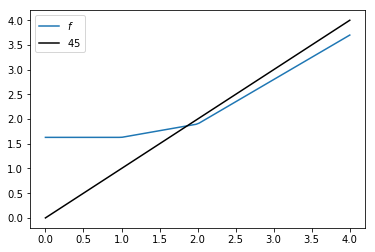

In [13]:
xvec = np.linspace(0, 4, 100)
yvec = [f(x) for x in xvec]

fig, ax = plt.subplots()
ax.plot(xvec, yvec, label='$f$')
ax.plot(xvec, xvec, 'k-', label='$45$')
ax.legend()
plt.show()

Now let's compute that fixed point by iteration:

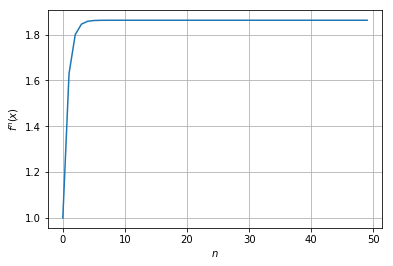

In [14]:
x = 1.0
x_vals = []
for i in range(50):
    x_vals.append(x)
    x = f(x)
    
fig, ax = plt.subplots()
ax.plot(x_vals)
ax.set(xlabel="$n$", ylabel="$f^n(x)$")
ax.grid()
plt.show()